Mini Project: Library SQL Database
=============================
### Group Members
- Caprill Wright (acw2et)
- Chelsea Alvarado (cxa6ky)
- Jess Chau (jc4vg)

### Database Description
The Library Database we have created allows for tracking of materials between libraries and patrons. Additionaly our DB can keep track of community events hosted by Libraries across the DB and which patrons have intended. Whether you want to keep track of Patron outstanding balances or how many books they've chekced out, our DB can help!

### Schemas
#### **Strong Entity Sets**
- Events(<span style="text-decoration: underline">Event_ID</span>, Event_Title, Host_Branch, Date)
- Library(<span style="text-decoration: underline">Branch_Name</span>, Location)
- Library_Log(<span style="text-decoration: underline">Ticket_Number</span>, Date_Borrowed, Account_Number, Material_ID) 
- Material(<span style="text-decoration: underline">Material_ID </span>, Author, Title, Type, Genre, Home_Branch_Location) 
- Patron(<span style="text-decoration: underline">Account_Number</span>, Name, Balance, Home_Branch_Name) 


#### **Relationships**
- Attends(<span style="text-decoration: underline">Account_Number</span>, Event_ID) 
- Borrows(<span style="text-decoration: underline">Transaction_ID</span>, Account_Number, Material_ID) 
- Hosts(<span style="text-decoration: underline">Event_ID</span>, Branch_Name)
- Maintains(<span style="text-decoration: underline">Ticket_Number</span>, Branch_Name)
- Owns(<span style="text-decoration: underline">Material_ID</span>, Branch_Name) 

#### **Assumptions**
- A material can only be borrowed by one patron at a given time
- Patrons can only attend one event at a time
- Every material must have a home branch
- An event can only be hosted by one library
- Each library has its own library log that cannot be modified by other branches





Library Database Schema


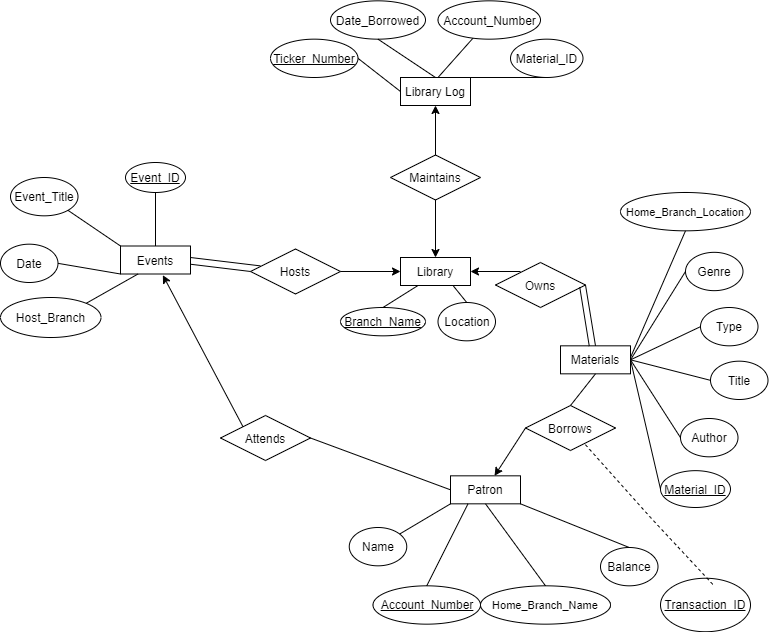

In [1]:
from IPython.display import Image
PATH = "C:/Users/17039/Downloads/Library DB Data/"
print("Library Database Schema")
Image(filename = PATH + "Library DB Schema.png", width = 1000, height = 1000)

## Python Code

In [2]:
# import libraries
import sqlite3
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# establish connection with DB
conn = sqlite3.connect('Library.db')

# cursor
cursor = conn.cursor()

### Creation of Tables and Insertion of CSV Data

In [4]:
# creation of entity tables
# materials
materials = '''CREATE TABLE IF NOT EXISTS Materials(
    Material_ID VARCHAR NOT NULL ,
    Author VARCHAR,
    Title VARCHAR NOT NULL,
    Type VARCHAR NOT NULL,
    Genre VARCHAR,
    Home_Branch_Location VARCHAR NOT NULL,
    PRIMARY KEY(Material_ID))'''
cursor.execute(materials)

#Library
library = '''CREATE TABLE IF NOT EXISTS Library(
    Branch_Name VARCHAR NOT NULL PRIMARY KEY,
    Location VARCHAR)'''
cursor.execute(library)

#Patron
patron = '''CREATE TABLE IF NOT EXISTS Patron(
     Account_Number VARCHAR NOT NULL,
    Name VARCHAR,
    Balance VARCHAR,
    Home_Branch_Name VARCHAR NOT NULL,
    PRIMARY KEY(Account_Number))'''
cursor.execute(patron)

#Events
events = '''CREATE TABLE IF NOT EXISTS Events(
    Event_ID VARCHAR NOT NULL,
    Event_Title VARCHAR,
    Date BLOB,
    Host_Branch VARCHAR NOT NULL,
    PRIMARY KEY(Event_ID))'''
cursor.execute(events)

#Library_Log
lib_log = '''CREATE TABLE IF NOT EXISTS Library_Log(
    Ticket_Number VARCHAR,
    Date_Borrowed BLOB,
    Account_Number VARCHAR NOT NULL,
    Material_ID VARCHAR NOT NULL,
    PRIMARY KEY(Ticket_Number)
    FOREIGN KEY(Account_Number) REFERENCES Patron(Account_Number),
    FOREIGN KEY(Material_ID) REFERENCES Materials(Material_ID))'''  
cursor.execute(lib_log)

# creation of relation tables
# maintains
maint = '''CREATE TABLE IF NOT EXISTS Maintains(
    Ticket_Number VARCHAR,
    Branch_Name VARCHAR,
    PRIMARY KEY(Ticket_Number),
    FOREIGN KEY (Ticket_Number) REFERENCES Library_Log,
    FOREIGN KEY(Branch_Name) REFERENCES Library)''' 
cursor.execute(maint)

# Hosts
hosts = '''CREATE TABLE IF NOT EXISTS Hosts(
    Event_ID VARCHAR,
    Branch_Name VARCHAR,
    PRIMARY KEY(Event_ID),
    FOREIGN KEY (Event_ID) REFERENCES Events,
    FOREIGN KEY(Branch_Name) REFERENCES Library)''' 
cursor.execute(hosts)

#Attends
attends = '''CREATE TABLE IF NOT EXISTS Attends(
    Account_Number VARCHAR,
    Event_ID VARCHAR,
    PRIMARY KEY(Account_Number),
    FOREIGN KEY (Account_Number) REFERENCES Patron,
    FOREIGN KEY (Event_ID) REFERENCES Events)''' 
cursor.execute(attends)

# borrows

borrows = '''CREATE TABLE IF NOT EXISTS Borrows(
    Transaction_ID VARCHAR PRIMARY KEY,
    Material_ID VARCHAR, 
    Account_Number VARCHAR,
    FOREIGN KEY(Material_ID) REFERENCES Materials(Material_ID),
    FOREIGN KEY(Account_Number) REFERENCES Account_Number(Patron))''' 
cursor.execute(borrows)

#owns
owns = '''CREATE TABLE IF NOT EXISTS Owns(
    Material_ID VARCHAR,
    Branch_Name VARCHAR,
    PRIMARY KEY(Material_ID),
    FOREIGN KEY(Branch_Name) REFERENCES Library,
    FOREIGN KEY (Material_ID) REFERENCES Materials)''' 
cursor.execute(owns)

In [5]:
# Insert Materials CSV
with open('Materials.csv', 'r') as dataFile:
    reader = csv.reader(dataFile)
    next(reader)
    for row in reader: # for each row in reader...
        m_records = 0
        cursor.execute("INSERT INTO Materials VALUES (?,?,?,?,?,?)", row)
        conn.commit()
        m_records += 1
# Insert Library CSV
with open('Library.csv', 'r') as dataFile:
    reader = csv.reader(dataFile)
    next(reader)
    for row in reader: # for each row in reader...
        l_records = 0
        cursor.execute(" INSERT INTO Library VALUES (?,?)", row)
        conn.commit()
        l_records += 1
# Insert Patron CSV
with open('Patron.csv', 'r') as dataFile:
    reader = csv.reader(dataFile)
    next(reader)
    for row in reader: # for each row in reader...
        p_records = 0
        cursor.execute(" INSERT INTO Patron VALUES (?,?,?,?)", row)
        conn.commit()
        p_records += 1
# Insert Events CSV
with open('Events.csv', 'r') as dataFile:
    reader = csv.reader(dataFile)
    next(reader)
    for row in reader: # for each row in reader...
        e_records = 0
        cursor.execute(" INSERT INTO Events VALUES (?,?,?,?)", row)
        conn.commit()
        e_records += 1
# Insert Library_Log CSV
with open('Library_Log.csv', 'r') as dataFile:
    reader = csv.reader(dataFile)
    next(reader)
    for row in reader: # for each row in reader...
        ll_records = 0
        cursor.execute(" INSERT INTO Library_Log VALUES (?,?,?,?)", row)
        conn.commit()
        ll_records += 1
# Insert Maintains CSV
with open('Maintains.csv', 'r') as dataFile:
    reader = csv.reader(dataFile)
    next(reader)
    for row in reader: # for each row in reader...
        ma_records = 0
        cursor.execute(" INSERT INTO Maintains VALUES (?,?)", row)
        conn.commit()
        ma_records += 1
# Insert Hosts CSV
with open('Hosts.csv', 'r') as dataFile:
    reader = csv.reader(dataFile)
    next(reader)
    for row in reader: # for each row in reader...
        h_records = 0
        cursor.execute(" INSERT INTO Hosts VALUES (?,?)", row)
        conn.commit()
        h_records += 1
# Insert Attends CSV
with open('Attends.csv', 'r') as dataFile:
    reader = csv.reader(dataFile)
    next(reader)
    for row in reader: # for each row in reader...
        a_records = 0
        cursor.execute(" INSERT INTO Attends VALUES (?,?)", row)
        conn.commit()
        a_records += 1
# Insert Borrows CSV
with open('Borrows.csv', 'r') as dataFile:
    reader = csv.reader(dataFile)
    next(reader)
    for row in reader: # for each row in reader...
        b_records = 0
        cursor.execute("INSERT INTO Borrows VALUES (?,?,?)", row)
        conn.commit()
        b_records += 1
# Insert Owns CSV
with open('Owns.csv', 'r') as dataFile:
    reader = csv.reader(dataFile)
    next(reader)
    for row in reader: # for each row in reader...
        o_records = 0
        cursor.execute(" INSERT INTO Library VALUES (?,?)", row)
        conn.commit()
        o_records += 1

## SQL Queries on DB

**1. Determine how many materials total are available at each library home branch location**

In [6]:
cursor.execute('''SELECT COUNT (Material_ID) as count_matid, Home_Branch_Location
FROM Materials
GROUP BY Home_Branch_Location''')
query1=cursor.fetchall()
pd.DataFrame(query1,columns=['count_matid', 'Home_Branch_Location']) #returns solution in pandas dataframe

,count_matid,Home_Branch_Location
0,4,Ashburn
1,2,Centreville
2,2,Fairfax
3,4,Great Falls
4,3,Landsdown
5,4,Sterling


**Solution:**  Ashburn: 4 materials, Centreville: 2 materials, Fairfax: 2 materials, Great Falls: 4 materials, Landsdown: 3 materials, Sterling: 4 materials

**2. Determine how many books are available at each library home branch location**

In [7]:
cursor.execute('''SELECT COUNT(Type), Home_Branch_Location
    FROM Materials
    WHERE Type = 'Book '
    GROUP BY Home_Branch_Location''')
query2=cursor.fetchall()
pd.DataFrame(query2,columns=['Type', 'Home_Branch_Location']) #returns

,Type,Home_Branch_Location
0,4,Ashburn
1,2,Centreville
2,2,Fairfax
3,4,Great Falls
4,2,Landsdown
5,3,Sterling


**Solution:** Ashburn: 4 books, Centreville 2 books, Fairfax: 2 books, Great Falls: 4 books, Landsdown: 2 books, Sterling: 3 books

**3. Find all the names of unique patrons who have borrowed a fantasy book and list the names alphabetically**

In [8]:
cursor.execute('''SELECT DISTINCT Name
FROM Materials m, Borrows b, Patron p
WHERE p.Account_Number = b.Account_Number AND b.Material_ID = m.Material_ID AND Genre = "Fantasy"
GROUP BY Name''')
query3=cursor.fetchall()
pd.DataFrame(query3,columns=['Name’']) #returns 

,Name’
0,Billie Eilish
1,Camila Cabello
2,Daisy Williams
3,Danica Roem
4,Demi Lovato
5,Jessica Alba
6,Joe Biden
7,Johnny Depp
8,Lady Gaga
9,Peter Dinklage


**Solution:** Billie Eilish, Camila Cabello, Daisy Williams, Danica Roem, Demi Lovato, Jessica Alba, Joe Biden, Johnny Depp, Lady Gaga, Peter Dinklage, Tom Araya

**4. Find the names and home branch of all the patrons who have accounts but never borrowed a book**

In [9]:
cursor.execute('''SELECT p.Name, p.Home_Branch_Name FROM Patron p 
WHERE NOT EXISTS (SELECT Account_Number FROM Library_Log l
WHERE l.Account_Number = p. Account_Number)''')
query4=cursor.fetchall()
noborrow = pd.DataFrame(query4,columns=['Name', 'Home Branch'])
noborrow.set_index('Name', inplace=True)
noborrow

,Home Branch
Name,
Randy Blythe,Sterling Library
Hayley Williams,Cascades Library
Alissa White-Gluz,Janelia Library
Jamie-Lynn Spears,Centreville Library


**Solution:** Randy Blythe Sterling Library, Hayley Williams Cascades Library, Alissa White-Gluz Janelia Library, Jamie-Lynn Spears Centreville Library

**5. Find the total amount of money outstanding and the average outstanding balance for each branch and order by Total Balance in descending order**

In [10]:
cursor.execute('''SELECT Home_Branch_Name AS Branch, sum(Balance) AS Total_Balance, avg(Balance) AS Average_Balance FROM Patron
GROUP BY Branch
ORDER BY Total_Balance DESC ''')
query5=cursor.fetchall()
owe_money = pd.DataFrame(query5,columns=['Branch', 'Total Balance','Average Balance'])
owe_money.set_index('Branch', inplace=True)
owe_money

,Total Balance,Average Balance
Branch,,
Cascades Library,109.93,36.643333
Janelia Library,73.13,18.282500
Centreville Library,51.15,17.050000
Fair Oaks Library,38.68,12.893333
Sterling Library,6.78,2.260000
Broadlands Library,0.20,0.066667


**Solution:** Cascades Library 109.93 36.64, Janelia Library	73.13 18.28, Centreville Library 51.15 17.05, Fair Oaks Library	38.68 12.89, Sterling Library 6.78 2.26, Broadlands Library	0.20 0.07

**6. Find the names of all the patrons who have accounts at Fair Oaks Library or Cascades Library**

In [11]:
query6 = cursor.execute('''SELECT p.Name, p.Home_Branch_Name FROM Patron p
WHERE p.Home_Branch_Name = "Fair Oaks Library" OR p.Home_Branch_Name = "Cascades Library"''')
query6=cursor.fetchall()
home_lib = pd.DataFrame(query6,columns=["Name", "Home Branch"])
home_lib.set_index('Name', inplace=True)
home_lib


,Home Branch
Name,
Johnny Depp,Fair Oaks Library
Jessica Alba,Cascades Library
Joe Biden,Fair Oaks Library
Hayley Williams,Cascades Library
Kamala Harris,Fair Oaks Library
Demi Lovato,Cascades Library


**Solution:** Johnny Depp Fair Oaks Library, Jessica Alba Cascades Library, Joe Biden Fair Oaks Library, Hayley Williams Cascades Library, Kamala Harris Fair Oaks Library, Demi Lovato Cascades Library

**7. Find the title and date of every borrowed book by Johnny Depp  from Centreville Library**

In [12]:
cursor.execute('''SELECT Name, m.Home_Branch_Location, Title, Date_Borrowed
FROM Library_Log l, Patron p, Materials m
WHERE l.Account_Number=p.Account_Number AND m.Material_ID=l.Material_ID AND m.Home_Branch_Location="Centreville" AND p.Name="Johnny Depp"
''')

query7=cursor.fetchall()
pd.DataFrame(query7,columns=['Name', 'Location', 'Book Title', 'Date Borrowed']) #returns 


,Name,Location,Book Title,Date Borrowed
0,Johnny Depp,Centreville,Harry Potter and the Chamber of Secrets,11/27/2020


**Solution:** Johnny Depp, Centreville, Harry Potter and the Chamber of Secrets, 11/27/2020

**8. Find all the materials that have been borrowed and list the number of times they've been borrowed in descending order**

In [13]:
cursor.execute('''SELECT Title, l.Material_ID, COUNT(Ticket_Number)
FROM Library_Log l, Materials m
WHERE l.Material_ID=m.Material_ID
GROUP BY m.Material_ID
ORDER BY COUNT(Ticket_Number) DESC
''')

query8=cursor.fetchall()
pd.DataFrame(query8,columns=['Material','Material ID','Borrows']) 

,Material,Material ID,Borrows
0,Raya and the Last Dragon,9000,3
1,Harry Potter and the Half-Blood Prince,6666,3
2,A Breath of Snow and Ashes,6000,3
3,Harry Potter and the Order of the Phoenix,5555,3
4,The Fiery Cross,5000,3
5,Harry Potter and the Prizoner of Azkaban,3333,3
6,Harry Potter and the Chamber of Secrets,2222,3
7,Dragonfly in Amber,2000,3
8,Harry Potter and the Philosopher's Stone,1111,3
9,Harry Potter and the Deathly Hallows,9999,2


**Solution:** Harry Potter and the Philosopher's Stone, 111131; 
Dragonfly in Amber, 200032; 
Harry Potter and the Chamber of Secrets, 222233; 
Harry Potter and the Prizoner of Azkaban, 333334; 
The Fiery Cross, 500035; 
Harry Potter and the Order of the Phoenix, 555536; 
A Breath of Snow and Ashes, 600037; 
Harry Potter and the Half-Blood Prince, 666638; 
Raya and the Last Dragon, 900039; 
Voyager, 3000210; 
Harry Potter and the Goblet of Fire, 4444211; 
An Echo in the Bone, 7000212; 
Written in My Own Heart's Blood, 8000213;
Harry Potter and the Deathly Hallows, 8888214; 
Harry Potter and the Deathly Hallows, 9999215; 
Harry Potter and the Deathly Hallows, 77771

**9. Find all the names of patrons who have borrowed materials from every library branch**

In [14]:
cursor.execute('''SELECT Name 
FROM Patron p
WHERE NOT EXISTS (SELECT Branch_Name 
FROM Library l
WHERE NOT EXISTS (SELECT m.Material_ID 
FROM Library_Log llog, Materials m
WHERE llog.Account_Number=p.Account_Number AND l.Location=m.Home_Branch_Location))''')
query9=cursor.fetchall()
pd.DataFrame(query9,columns=['Name']) 

,Name


**Solution:** Should be empty

**10. Find the name of patrons who have borrowed a book that has been borrowed multiple times. List the title of the book in addition to the patrons name**

In [15]:
cursor.execute(''' SELECT Name, Title FROM
(SELECT Title, Account_Number AS acc
FROM Library_Log l, Materials m
WHERE m.Material_Id = l.Material_ID)
JOIN Patron p
ON acc = p.Account_Number
ORDER BY Title
''')

query10=cursor.fetchall() 
pd.DataFrame(query10,columns=['Patron Name','Material Title']) 

,Patron Name,Material Title
0,Peter Dinklage,A Breath of Snow and Ashes
1,Daisy Williams,A Breath of Snow and Ashes
2,Jessica Alba,A Breath of Snow and Ashes
3,Daisy Williams,An Echo in the Bone
4,Kamala Harris,An Echo in the Bone
5,Chris Hemsworth,Dragonfly in Amber
6,Jennifer Lopez,Dragonfly in Amber
7,Demi Lovato,Dragonfly in Amber
8,Joe Biden,Harry Potter and the Chamber of Secrets
9,Johnny Depp,Harry Potter and the Chamber of Secrets


**Solution** 
-   Peter Dinklage	A Breath of Snow and Ashes
- 	Daisy Williams	A Breath of Snow and Ashes
- 	Jessica Alba	A Breath of Snow and Ashes
-	Daisy Williams	An Echo in the Bone
-	Kamala Harris	An Echo in the Bone
-	Chris Hemsworth	Dragonfly in Amber
-	Jennifer Lopez	Dragonfly in Amber
-	Demi Lovato	Dragonfly in Amber
-	Joe Biden	Harry Potter and the Chamber of Secrets	Johnny Depp	Harry Potter and the Chamber of Secrets
-	Camila Cabello	Harry Potter and the Chamber of Secrets
-	Tom Araya	Harry Potter and the Deathly Hallows
-	Tom Araya	Harry Potter and the Deathly Hallows
-	Joe Biden	Harry Potter and the Deathly Hallows
-	Johnny Depp	Harry Potter and the Deathly Hallows
-	Demi Lovato	Harry Potter and the Deathly Hallows
-	Joe Biden	Harry Potter and the Goblet of Fire
-	Daisy Williams	Harry Potter and the Goblet of Fire
-	Danica Roem	Harry Potter and the Half-Blood Prince
-	Tom Araya	Harry Potter and the Half-Blood Prince
-	Tom Araya	Harry Potter and the Half-Blood Prince
-	Billie Eilish	Harry Potter and the Order of the Phoenix
-	Lady Gaga	Harry Potter and the Order of the Phoenix
-	Johnny Depp	Harry Potter and the Order of the Phoenix
-	Peter Dinklage	Harry Potter and the Philosopher's Stone
-	Demi Lovato	Harry Potter and the Philosopher's Stone
-	Demi Lovato	Harry Potter and the Philosopher's Stone
-	Camila Cabello	Harry Potter and the Prizoner of Azkaban
-	Billie Eilish	Harry Potter and the Prizoner of Azkaban
-	Jessica Alba	Harry Potter and the Prizoner of Azkaban
-	Daisy Williams	Raya and the Last Dragon
-	Jessica Alba	Raya and the Last Dragon
-	Lady Gaga	Raya and the Last Dragon
-	Peter Dinklage	The Fiery Cross
-	Billie Eilish	The Fiery Cross
-	Billie Eilish	The Fiery Cross
-	Chris Hemsworth	Voyager
-   Daisy Williams	Voyager
-	Johnny Depp	Written in My Own Heart's Blood
-	Kit Herrington	Written in My Own Heart's Blood

## Visualizations

**1. Bar chart with number of books available at each library**

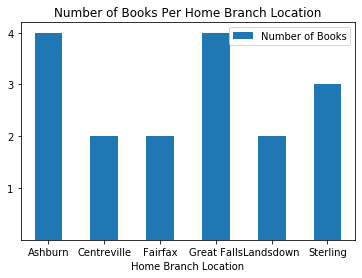

In [16]:
#sample python code for creating bar chart from: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
#df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
#ax = df.plot.bar(x='lab', y='val', rot=0)

#python code for adding title and setting yticks: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

data1 = pd.DataFrame({'Home Branch Location': ['Ashburn', 'Centreville','Fairfax','Great Falls','Landsdown','Sterling'], 'Number of Books': [4, 2, 2, 4, 2, 3]})
visual1 = data1.plot.bar(x='Home Branch Location', y='Number of Books', yticks=[1, 2, 3, 
4], rot=0, title = 'Number of Books Per Home Branch Location')

**2. Books rented over time**

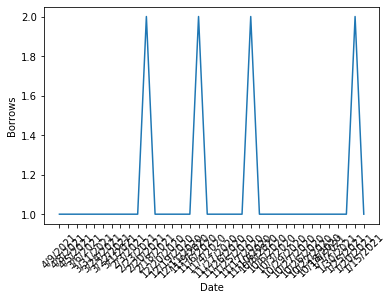

In [17]:
cursor.execute('''SELECT Title, l.Date_Borrowed, COUNT(Ticket_Number)
FROM Library_Log l, Materials m
WHERE l.Material_ID=m.Material_ID
GROUP BY l.Date_Borrowed
ORDER BY l.Date_Borrowed DESC
''')

query8=cursor.fetchall()
data2=pd.DataFrame(query8,columns=['Material','Date','Borrows'])

plt.plot(data2.Date, data2.Borrows)
plt.xlabel('Date')
plt.ylabel('Borrows')
 
# 0 is the initial value, 51 is the final value
# (last value is not taken) and 5 is the difference
# of values between two consecutive ticks
plt.tick_params(axis ='x', rotation = 45)
plt.show()

**3. Bar chart for number of borrows at each library**

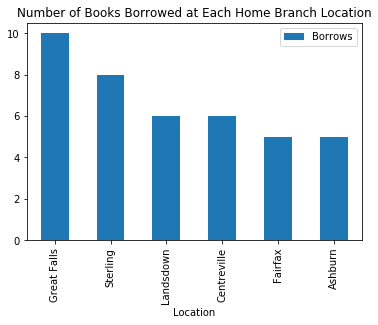

In [18]:
cursor.execute('''SELECT Home_Branch_Location, COUNT(Ticket_Number)
FROM Library_Log l, Materials m
WHERE l.Material_ID=m.Material_ID
GROUP BY m.Home_Branch_Location
ORDER BY COUNT(Ticket_Number) DESC
''')

query8=cursor.fetchall()
data3=pd.DataFrame(query8,columns=['Location','Borrows'])
data3.plot.bar(x="Location",y="Borrows", title = 'Number of Books Borrowed at Each Home Branch Location')

**4. Average outstanding balance and total balance at each branch**

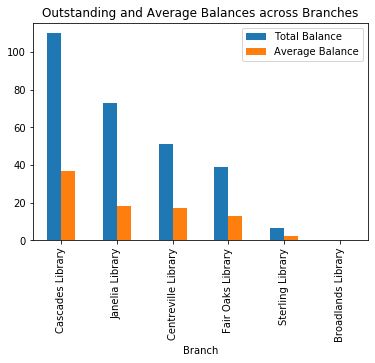

In [19]:
owe_money.plot.bar(title="Outstanding and Average Balances across Branches")

In [20]:
# close out DB
cursor.close()